In [26]:
import yt
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import pickle as pickle
from unyt import g,cm
from numpy.linalg import eig
import seaborn as sns
import pandas as pd
import scipy
with open('angle_new.pkl','rb')as f:
    angle = pickle.load(f)

with open('lyman_cul.pkl','rb')as f:
    lyman = pickle.load(f)

(array([355., 330., 309., 352., 312., 311., 288., 246., 213., 179.]),
 array([8.62946245e-05, 1.00002269e-01, 1.99918243e-01, 2.99834218e-01,
        3.99750192e-01, 4.99666166e-01, 5.99582141e-01, 6.99498115e-01,
        7.99414089e-01, 8.99330064e-01, 9.99246038e-01]),
 <BarContainer object of 10 artists>)

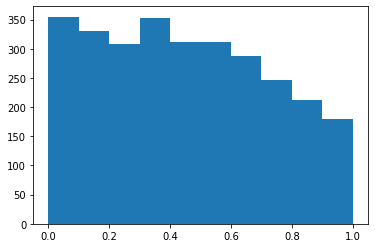

In [27]:
plt.hist(angle)

In [28]:
d = {'angle':angle, 'Lyman' : np.log10(lyman)}
df = pd.DataFrame(d)

In [29]:
data =[]
for i,k in zip(lyman, angle):
    data.append([i,k])
lower = data[:724]
lower_data = []
for i in lower:
        lower_data.append(i[1])
upper = data[1448:]
upper_data = []
for i in upper:
        upper_data.append(i[1])
middle = data[724:1448]
middle_data = []
for i in middle:
        middle_data.append(i[1])

<AxesSubplot:ylabel='Proportion'>

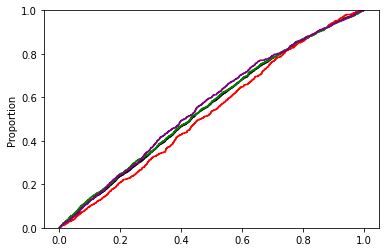

In [30]:
sns.ecdfplot(x=angle,c = 'black')
sns.ecdfplot(x=lower_data, c = 'red')
sns.ecdfplot(x=upper_data, c = 'green')
sns.ecdfplot(x=middle_data,c = 'purple')

Text(27.125, 0.5, '$\\mathrm{Cos(}$$\\theta$$)$')

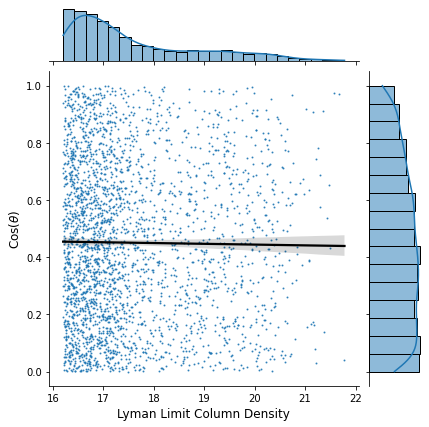

In [31]:
from scipy.stats import pearsonr
h = sns.jointplot(data=df,  x="Lyman",y= "angle" , scatter_kws={'s': 1},kind="reg", line_kws={"color": "black"})
h.set_axis_labels('x', 'y', fontsize=12)
h.ax_joint.set_xlabel('Lyman Limit Column Density')
h.ax_joint.set_ylabel('$\mathrm{Cos(}$'r"$\theta$"'$)$')

/tmp/ipykernel_16450/690891572.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.ax_joint.set_xticklabels([16,17,18,19,20,21],size =13)
/tmp/ipykernel_16450/690891572.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.ax_joint.set_yticklabels([0,0.2,0.4,0.6,0.8,1.],size =13)


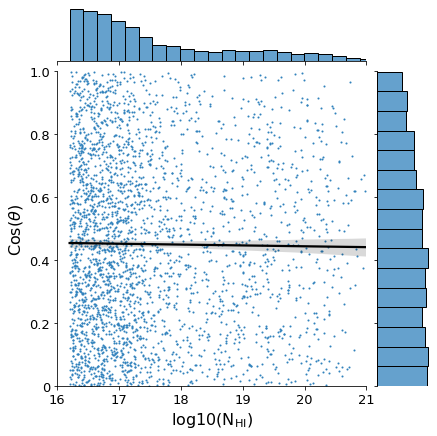

In [32]:
import scipy.stats as stats

g=sns.JointGrid(data=df,  x="Lyman",y= "angle", xlim = (16,21),ylim = (0,None))
g.plot_joint(sns.regplot,scatter_kws={'s':1.1,'color':"#3182bd",'alpha': 1},line_kws={"color": "black"})
g.plot_marginals(sns.histplot,color = "#3182bd")
g.set_axis_labels('x', 'y', fontsize=16)
g.ax_joint.set_xlabel("$\mathrm{log10(N_{HI})}$")
g.ax_joint.set_ylabel('$\mathrm{Cos(}$'r"$\theta$"'$)$')
g.ax_joint.set_xticklabels([16,17,18,19,20,21],size =13)
g.ax_joint.set_yticklabels([0,0.2,0.4,0.6,0.8,1.],size =13)
g.savefig('cos_theta.pdf')